In [4]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import synapseclient

# MSK

## Loading data

In [5]:
syn = synapseclient.Synapse()
syn.login()

Welcome, heimann!



In [6]:
#Load data
entity = syn.get('syn61488601')
adata = sc.read_h5ad(entity.path)
adata

AnnData object with n_obs × n_vars = 16475 × 25032
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'author_cell_type', 'cell_type_broad', 'clusters', 'treatment_categorized', 'subtype', 'H_treatment', 'H_subtype', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'citation', 'neighbors', 'schema_reference', 'schema_version', 'title'
    ob

In [7]:
obs_meta = pd.DataFrame({
        'sample_id': adata.obs["HTAN_Biospecimen_ID"],
        'cell_type': adata.obs["cell_type_broad"],
        'umap_1': adata.obsm["X_umap"][:,0], 
        'umap_2': adata.obsm["X_umap"][:,1],
        'dataset': "MSK"
    }
)
obs_meta

,sample_id,cell_type,umap_1,umap_2,dataset
Cell,,,,,
RU1311A_T_1_165945547864806,HTA8_2016_1,T cells,0.244110,1.536872,MSK
PleuralEffusion_235007433161052,HTA8_2001_1,T cells,8.241975,-2.223363,MSK
RU779D_231906420612515,HTA8_2019_1,T cells,1.640177,-2.405717,MSK
RU1145_133982151621558,HTA8_2008_1,T cells,3.718385,-1.936135,MSK
RU779D_236700571186918,HTA8_2019_1,T cells,-2.198981,-4.366380,MSK
...,...,...,...,...,...
RU1145_157536929573171,HTA8_2008_1,NK,6.983007,-2.508720,MSK
RU1145_161890937236718,HTA8_2008_1,Myeloid,-9.196468,7.102211,MSK
PleuralEffusion_131097900824419,HTA8_2001_1,T cells,9.347789,-2.828787,MSK


In [ ]:
#let's upload the umap coordinates as a file
obs_meta.to_csv('msk_umap.tsv', sep='\t', index=True)
file_entity = synapseclient.File('msk_umap.tsv', 'syn61486283')
file_entity = syn.store(file_entity)

In [28]:
#let's take a look at the raw counts
adata.layers['counts'] = adata.X
adata.to_df(layer = "counts")

gene_ids,ENSG00000121410,ENSG00000148584,ENSG00000175899,ENSG00000166535,ENSG00000184389,ENSG00000128274,ENSG00000118017,ENSG00000094914,ENSG00000081760,ENSG00000114771,...,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755,ENSG00000036549
Cell,,,,,,,,,,,,,,,,,,,,,
RU1311A_T_1_165945547864806,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
PleuralEffusion_235007433161052,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
RU779D_231906420612515,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
RU1145_133982151621558,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.723583,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
RU779D_236700571186918,1.472292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,1.472292,0.0,0.0,0.0,0.00000,2.185627,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RU1145_157536929573171,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
RU1145_161890937236718,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
PleuralEffusion_131097900824419,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,2.611757,0.0,0.0


# QC

This file already has QC metrics in the obs, so we just need to plot them to get a sense of the filtering that needs to be done.

According to the study manuscript, the following filtering was performed:

*The pipeline then performs the following initial cell filtering steps: 1) true
cells are distinguished from empty droplets based on the cumulative distribution of total molecule counts; 2) cells with a high fraction
of mitochondrial molecules are filtered (> 20%); and 3) cells with low library complexity are filtered (cells that express very few unique
genes). In addition, we perform additional filtering of empty droplets using the CB2 package with parameter ‘‘lower’’ set at 100 to
estimate the background distribution of ambient RNA and an FDR threshold of 0.01 for calling real cells (Ni et al., 2020). Putative dou-
blets were removed using the DoubletDetection package (https://doi.org/10.5281/zenodo.2658729). Genes that were expressed in
more than 10 cells were retained for further analysis.*

Text(0, 0.5, 'N cells')

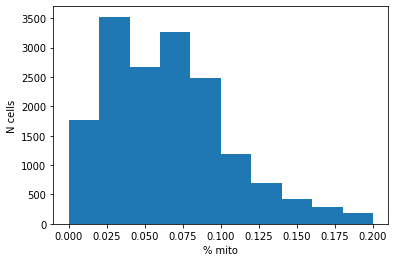

In [22]:
plt.hist(adata.obs['mito_frac'])
plt.xlabel('% mito')
plt.ylabel('N cells')

In [23]:
pd.DataFrame.describe(adata.obs['mito_frac'])

count    16475.000000
mean         0.065123
std          0.039500
min          0.000000
25%          0.031790
50%          0.061619
75%          0.087659
max          0.200000
Name: mito_frac, dtype: float64

We can see from this data that the authors already filtered cells with mito_frac > 20% (as mentioned in the manuscript)

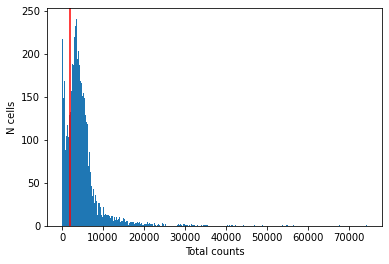

In [24]:
#plot histogram of number of counts per cell
plt.hist(adata.obs['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(2000, color='red')
#plt.xlim(0,1e3) just to take a look if there was filtering around 0 counts per cell

In [25]:
pd.DataFrame.describe(adata.obs['total_counts'])

count    16475.000000
mean      4787.328125
std       4556.438965
min        101.000000
25%       2389.500000
50%       3901.000000
75%       5727.500000
max      74341.000000
Name: total_counts, dtype: float64

From the plot and the statistics, we can infer that the step 1 in filtering (*1)true cells are distinguished from empty droplets based on the cumulative distribution of total molecule count*) used a threshold of 100 for total counts.

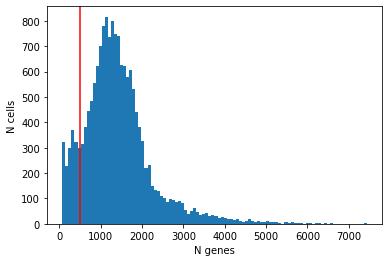

In [26]:
#plot histogram of number of unique genes by cells
plt.hist(adata.obs['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axvline(500, color='red')
#plt.xlim(0,4e3)

In [27]:
pd.DataFrame.describe(adata.obs['n_genes_by_counts'])

count    16475.000000
mean      1412.697785
std        842.629600
min         71.000000
25%        892.500000
50%       1301.000000
75%       1760.000000
max       7431.000000
Name: n_genes_by_counts, dtype: float64

From the plot and the statistics, we can infer that the step 3 in filtering (*3) cells with low library complexity are filtered (cells that express very few unique genes)*) used a threshold of 70 for number of genes expressed by a cell.

#### So, it appears that we already have a file with data that went through pre-processing. No further filtering will be made to the original file.

# Formatting to run pseudobulk

In [33]:
# #change gene id from ensembl to gene symbol (stored in var)
adata.var = adata.var.reset_index().rename(columns={'gene_ids': 'ensembl_gene_id'}
                                          ).set_index('feature_name')

# save raw counts as a layer
adata.layers['counts'] = adata.X

# Normalize and log-transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.layers['normalized'] = adata.X


/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A3GALT2']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)


In [35]:
adata

AnnData object with n_obs × n_vars = 16475 × 25090
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'author_cell_type', 'cell_type_broad', 'clusters', 'treatment_categorized', 'subtype', 'H_treatment', 'H_subtype', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'ensembl_gene_id', 'feature_is_filtered', 'feature_reference', 'feature_biotype'
    uns: 'neighbors', 'schema_version', 'title', 'log1p'
    obsm: 'X_pca', 'X_umap'
    layers: 'log2(X+0.1)', 'normalized', 'counts'
   

In [36]:
adata.write('msk_SCLCimmunecells_iatlas.h5ad')
file_entity = synapseclient.File('msk_SCLCimmunecells_iatlas.h5ad', 'syn61486284')
file_entity = syn.store(file_entity)